<a href="https://colab.research.google.com/github/HEMA1188/Assignment_11_12_13_14_15/blob/main/Copy_of_KNN_Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [35]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.columns



Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [3]:
display(df.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.head(100)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
95,15709441,Female,35,44000,0
96,15710257,Female,35,25000,0
97,15582492,Male,28,123000,1
98,15575694,Male,35,73000,0


In [7]:
gender=pd.get_dummies(df['Gender'], drop_first=True)
df=pd.concat([df,gender], axis=1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [8]:
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Male'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Male               0
dtype: int64

In [15]:
X=df.drop(['Purchased','Gender','User ID'],axis=1)
Y=df['Purchased']

**Splitting the dataset into the Training set and Test set**

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

**Feature Scaling**

In [56]:
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


**Fitting K-NN to the Training set**

In [57]:
knnc=knn.fit(x_train,y_train)

**Predicting the Test set results**

In [58]:
pred=knnc.predict(x_test)

**Making the Confusion Matrix**

In [59]:
ConFusMat=confusion_matrix(y_test,pred)
print(ConFusMat)

[[60  8]
 [ 8 24]]


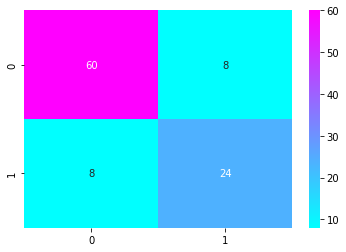

In [60]:
sns.heatmap(ConFusMat, annot=True, fmt='d', cmap='cool')
plt.show()

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        68
           1       0.75      0.75      0.75        32

    accuracy                           0.84       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.84      0.84      0.84       100



WITH K=10


[[65  3]
 [15 17]]


              precision    recall  f1-score   support

           0       0.81      0.96      0.88        68
           1       0.85      0.53      0.65        32

    accuracy                           0.82       100
   macro avg       0.83      0.74      0.77       100
weighted avg       0.82      0.82      0.81       100





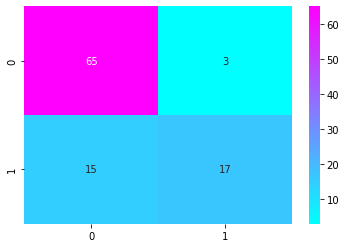

In [63]:
knn1 = KNeighborsClassifier(n_neighbors=10)

knn1.fit(x_train,y_train)
pred1 = knn1.predict(x_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred1))
sns.heatmap(confusion_matrix(y_test,pred1), annot=True, fmt='d', cmap='cool')
print('\n')
print(classification_report(y_test,pred1))
print('\n')